The data set that I have chosen to investigate is a world population by age group data set. Age groups are separted into intervals of 5. Each row is a total population of a year between 1950 to 2023 for each country in the world. Columns represent a total population of all sexes for that year in that country, as well as a separation of total per age group for that counrty.

The Data Set: https://www.kaggle.com/datasets/willianoliveiragibin/population-by-age-group?resource=download

### Main Inquiry and Sub-Questions

How has the global population structure changed between 1950 and 2023, and what implications does this have for the future?
- How has the birth rate of the population changed over time across different regions and countries?
- What is the trend in the global working-age population (ages 15-64), and how does it differ between developed and developing countries?
- What are the trends in population aging (65+ years) in different countries, and how have they affected the overall dependency ratio?

### Cleaning the Data Set and Storing It Into a Pivot Table

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('population.csv')

In [19]:
print(df.dtypes)

Entity                                                     object
Year                                                        int64
Population - Sex: all - Age: 0-4 - Variant: estimates       int64
Population - Sex: all - Age: 5-9 - Variant: estimates       int64
Population - Sex: all - Age: 10-14 - Variant: estimates     int64
Population - Sex: all - Age: 15-19 - Variant: estimates     int64
Population - Sex: all - Age: 20-24 - Variant: estimates     int64
Population - Sex: all - Age: 25-29 - Variant: estimates     int64
Population - Sex: all - Age: 30-34 - Variant: estimates     int64
Population - Sex: all - Age: 35-39 - Variant: estimates     int64
Population - Sex: all - Age: 40-44 - Variant: estimates     int64
Population - Sex: all - Age: 45-49 - Variant: estimates     int64
Population - Sex: all - Age: 50-54 - Variant: estimates     int64
Population - Sex: all - Age: 55-59 - Variant: estimates     int64
Population - Sex: all - Age: 60-64 - Variant: estimates     int64
Population

In [20]:
df.shape

(18944, 23)

In [42]:
#Dropping null values
age_dist = df.dropna()

#Dropping duplicates
age_dist = age_dist.drop_duplicates()

#Ensuring that Year is numeric
age_dist['Year'] = pd.to_numeric(age_dist['Year'], errors='coerce', downcast='integer')

#Selecting columns related to population
population_columns = [col for col in age_dist.columns if 'Population' in col]

#Creating new data frame with relevant columns
age_distribution_data = age_dist[['Entity', 'Year'] + population_columns]

#Pivoting the data
pivot_table = age_distribution_data.pivot_table(
    index=['Entity', 'Year'],  
    values=population_columns, 
    aggfunc='sum'              
)

#Reset index to make 'Entity' and 'Year' columns again
pivot_table = pivot_table.reset_index()

#Showing the newly cleaned table
print(pivot_table.head())

#Saving cleaned data
pivot_table.to_csv('cleaned_population_age_distribution.csv', index=False)

        Entity  Year  Population - Sex: all - Age: 0-4 - Variant: estimates  \
0  Afghanistan  1950                                            1300032       
1  Afghanistan  1951                                            1304861       
2  Afghanistan  1952                                            1312385       
3  Afghanistan  1953                                            1324540       
4  Afghanistan  1954                                            1342583       

   Population - Sex: all - Age: 10-14 - Variant: estimates  \
0                                             887698         
1                                             900678         
2                                             913317         
3                                             926851         
4                                             943652         

   Population - Sex: all - Age: 100+ - Variant: estimates  \
0                                                  0        
1                             

In [17]:
pivot_table.shape

(18944, 23)

### How has the birth rate of the population changed over time across different regions and countries?

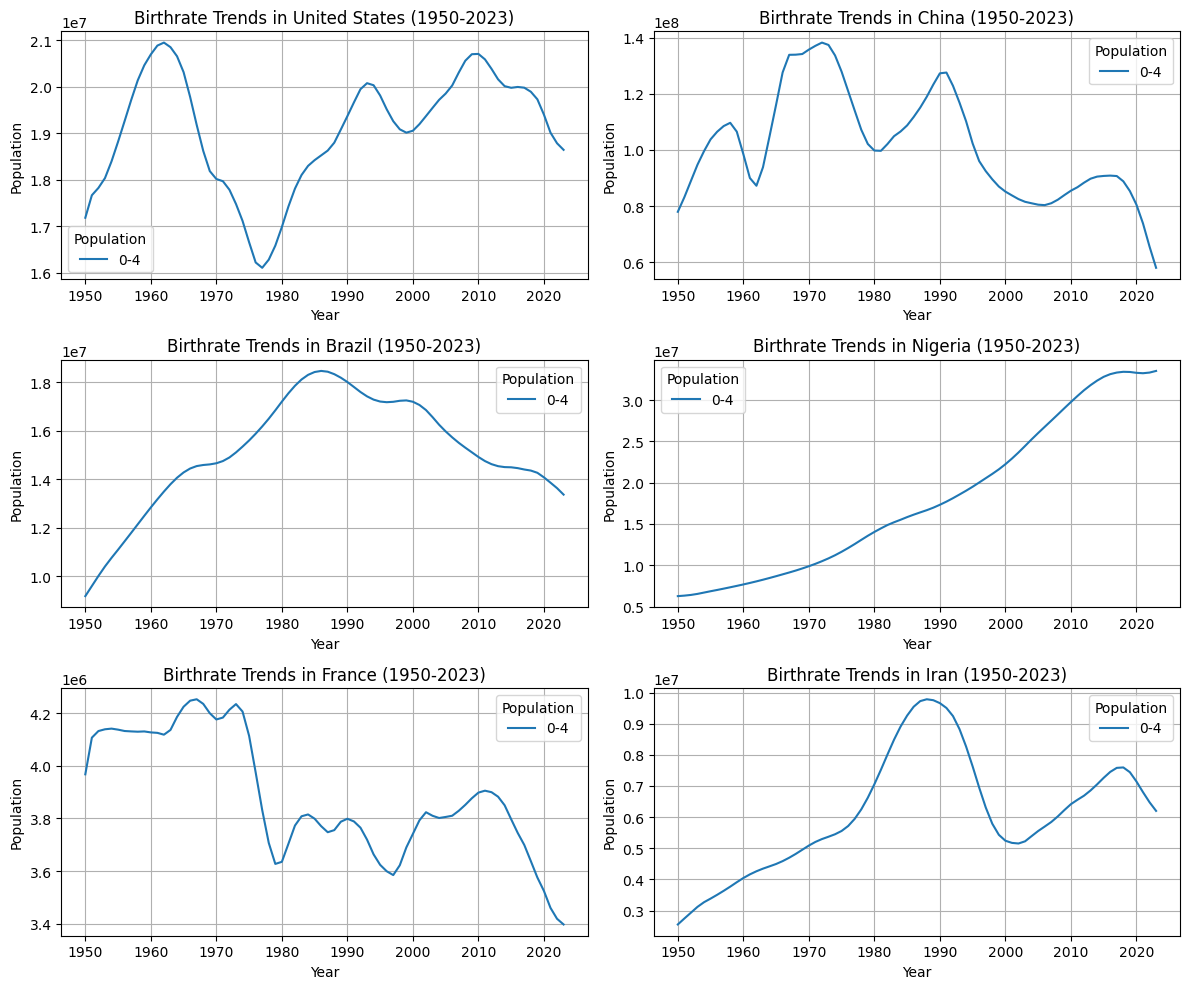

In [62]:
#List of countries to plot
countries = ['United States', 'China', 'Brazil', 'Nigeria', 'France', 'Iran']

# Age groups to plot for each country
age_groups = [
    'Population - Sex: all - Age: 0-4 - Variant: estimates',
]

# Create subplots with 2 rows and 2 columns
fig, axs = plt.subplots(3, 2, figsize=(12, 10))

# Flatten the axs array for easier iteration
axs = axs.flatten()

# Loop over the countries and plot data for each
for i, country in enumerate(countries):
    country_data = pivot_table[pivot_table['Entity'] == country]
    
    for age_group in age_groups:
        axs[i].plot(country_data['Year'], country_data[age_group], label=age_group.split('Age: ')[-1].split(' ')[0])
    
    # Setting labels for subplots
    axs[i].set_title(f'Birthrate Trends in {country} (1950-2023)')
    axs[i].set_xlabel('Year')
    axs[i].set_ylabel('Population')
    axs[i].legend(title='Population')
    axs[i].grid(True)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the combined subplot
plt.show()

### What is the trend in the global working-age population (ages 15-64), and how does it differ between developed and developing countries?

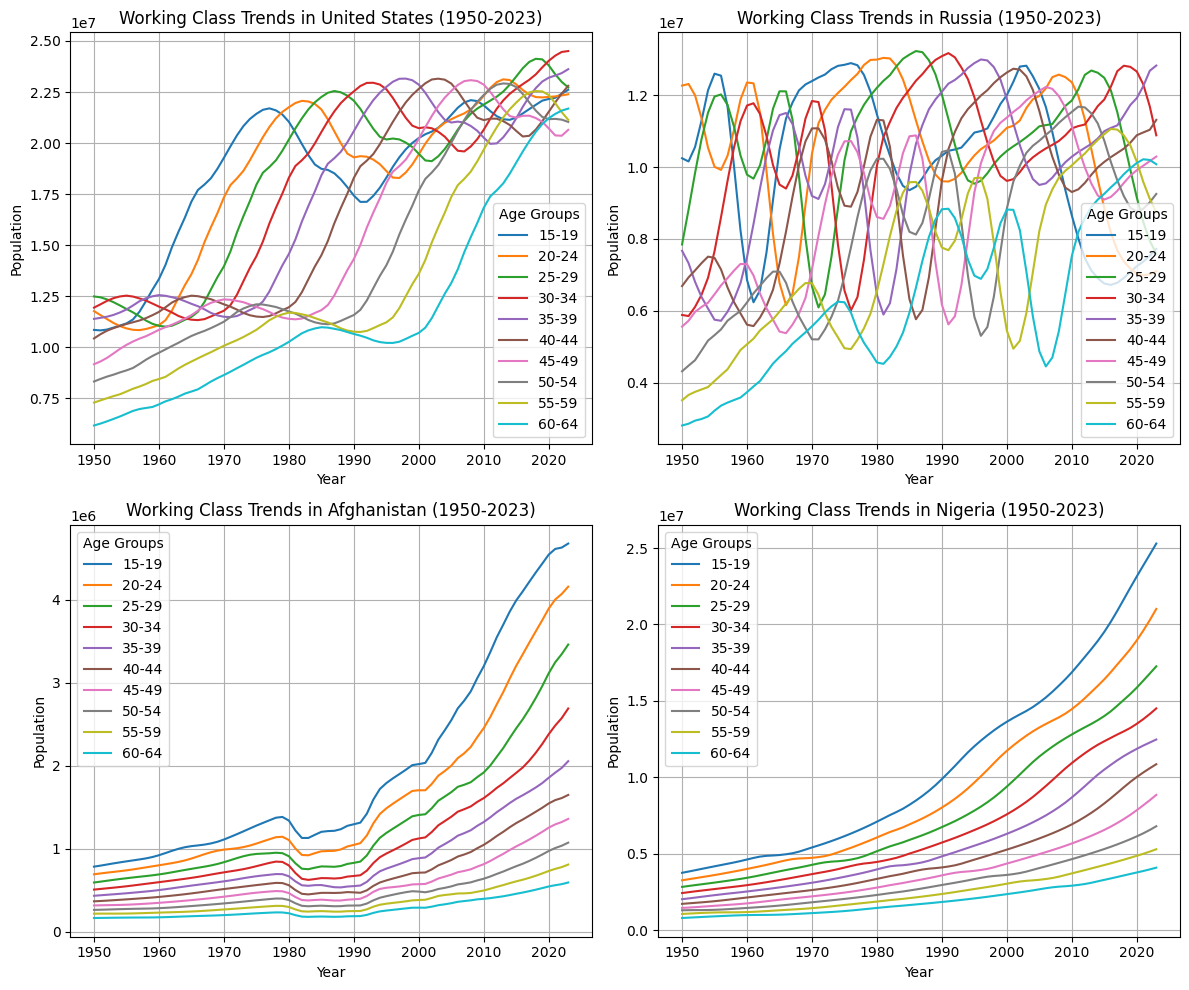

In [50]:
#List of countries to plot
countries = ['United States', 'Russia', 'Afghanistan', 'Nigeria']

# Age groups to plot for each country
age_groups = [
    'Population - Sex: all - Age: 15-19 - Variant: estimates',
    'Population - Sex: all - Age: 20-24 - Variant: estimates',
    'Population - Sex: all - Age: 25-29 - Variant: estimates',
    'Population - Sex: all - Age: 30-34 - Variant: estimates',
    'Population - Sex: all - Age: 35-39 - Variant: estimates',
    'Population - Sex: all - Age: 40-44 - Variant: estimates',
    'Population - Sex: all - Age: 45-49 - Variant: estimates',
    'Population - Sex: all - Age: 50-54 - Variant: estimates',
    'Population - Sex: all - Age: 55-59 - Variant: estimates',
    'Population - Sex: all - Age: 60-64 - Variant: estimates'
]

# Create subplots with 2 rows and 2 columns
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Flatten the axs array for easier iteration
axs = axs.flatten()

# Loop over the countries and plot data for each
for i, country in enumerate(countries):
    country_data = pivot_table[pivot_table['Entity'] == country]
    
    for age_group in age_groups:
        axs[i].plot(country_data['Year'], country_data[age_group], label=age_group.split('Age: ')[-1].split(' ')[0])
    
    # Setting labels for subplots
    axs[i].set_title(f'Working Class Trends in {country} (1950-2023)')
    axs[i].set_xlabel('Year')
    axs[i].set_ylabel('Population')
    axs[i].legend(title='Age Groups')
    axs[i].grid(True)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the combined subplot
plt.show()

### What are the trends in population aging (65+ years) in different countries, and how have they affected the overall dependency ratio?

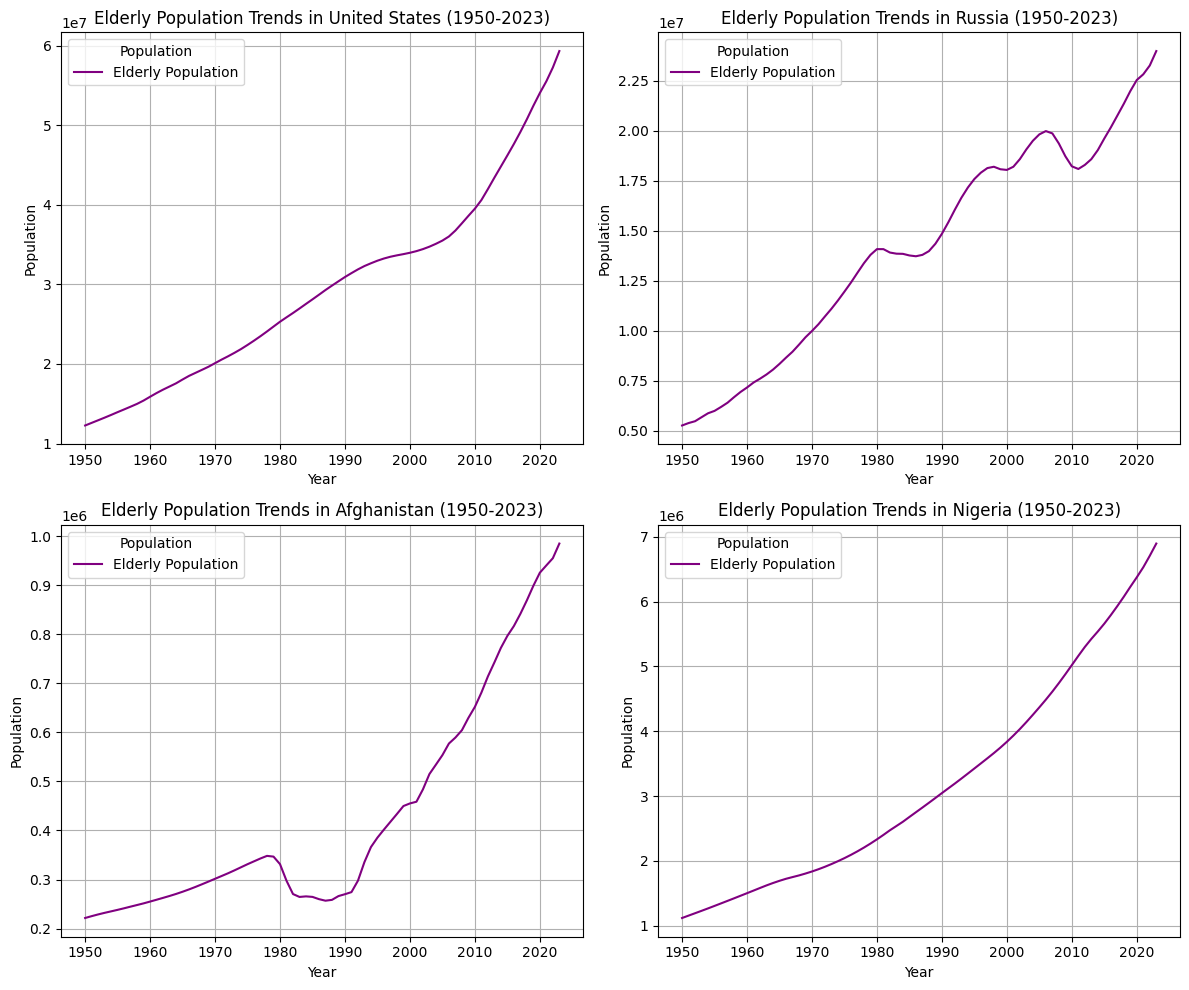

In [61]:
#List of countries to plot
countries = ['United States', 'Russia', 'Afghanistan', 'Nigeria']

# Age groups to plot for each country
age_groups = [
    'Population - Sex: all - Age: 65-69 - Variant: estimates',
    'Population - Sex: all - Age: 70-74 - Variant: estimates',
    'Population - Sex: all - Age: 75-79 - Variant: estimates',
    'Population - Sex: all - Age: 80-84 - Variant: estimates',
    'Population - Sex: all - Age: 85-89 - Variant: estimates',
    'Population - Sex: all - Age: 90-94 - Variant: estimates'
]

#Creating a column named 'elderly pop' to sum the elderly population
pivot_table['elderly_pop'] = pivot_table[age_groups].sum(axis=1)

# Create subplots with 2 rows and 2 columns
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Flatten the axs array for easier iteration
axs = axs.flatten()

# Loop over the countries and plot data for each
for i, country in enumerate(countries):
    country_data = pivot_table[pivot_table['Entity'] == country]

    #Plot elderly population on a single line
    axs[i].plot(country_data['Year'], country_data['elderly_pop'], label='Elderly Population', color='purple')
    
    # Setting labels for subplots
    axs[i].set_title(f'Elderly Population Trends in {country} (1950-2023)')
    axs[i].set_xlabel('Year')
    axs[i].set_ylabel('Population')
    axs[i].legend(title='Population')
    axs[i].grid(True)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the combined subplot
plt.show()